# **COMPARTIVE ANALYSIS OF NLP MODELS FOR RESUME SCREENING**

**Project Phases**

Data Loading and Preparation:

Load the CSV files for resumes and JDs.

Preprocess the data (e.g., text cleaning, stopword removal).

Define labels for matches (e.g., 1 for relevant matches, 0 for non-relevant).

Feature Extraction Methods:

**Logistic Regression with TF-IDF.**

**BERT.**

**RoBERTa.**

**DistilBERT**

Model Training and Evaluation:

Use algorithms like Logistic Regression or Random Forest.

Train models with each feature extraction method.

Evaluate using metrics like accuracy, precision, recall, F1-score, and confusion matrix.

Comparison and Insights:

Compare the performances of the models.

Visualize cosine similarity scores, confusion matrices, and other evaluation metrics.

Final Output:

Clearly identify which resumes match which JDs.

Summarize findings in a structured, visual format.



Step 1: Data Loading and Exploration

Let’s start by loading the provided datasets and exploring their structure.

Code to Load and Explore Data

This code loads two datasets—Resumes.csv and JobDescriptions.csv—into pandas DataFrames for further analysis. The head() function is used to preview the first few rows of each dataset, helping to verify the data structure and content.

In [1]:
import pandas as pd

# Load the resumes and JDs datasets
resumes = pd.read_csv('/content/Resumes.csv')
job_descriptions = pd.read_csv('/content/JobDescriptions.csv')

# Display the first few rows of each dataset
print("Resumes Dataset:")
print(resumes.head())

print("\nJob Descriptions Dataset:")
print(job_descriptions.head())



Resumes Dataset:
                               ResumeID            Name  \
0  3c68129b-d3f9-4413-b120-876f51b7816c      Dan Chavez   
1  99bf57a9-dde6-4a80-8c87-aa78cb1dd997   Tyler Burnett   
2  10982dd7-f617-4b76-9016-593261580d1e    Donald Garza   
3  f2ed03e9-7ce6-4e1e-aaf3-5f6fa287de23      David Ford   
4  d159414f-36bf-46b6-8012-3189ab4332af  Nicholas Welch   

                                             Summary  \
0                  Thank above let unit watch right.   
1  Cut quickly event eat role budget agreement op...   
2       Quality that black same real first actually.   
3                              Candidate form board.   
4               Politics impact else somebody image.   

                                          Experience  \
0  10 years of experience in data science and ana...   
1  2 years of experience in data science and anal...   
2  7 years of experience in data science and anal...   
3  1 years of experience in data science and anal...   
4  1 years 

This code checks the structure and completeness of the resumes and job_descriptions datasets:

info() Method: Displays a concise summary of each dataset, including:
The number of non-null values in each column (to check for missing data).
Data types of the columns (e.g., integers, floats, strings).
The overall structure of the dataset.

In [2]:
# Check for null values and data stats
print("\nResumes Dataset Info:")
print(resumes.info())

print("\nJob Descriptions Dataset Info:")
print(job_descriptions.info())



Resumes Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ResumeID           300 non-null    object
 1   Name               300 non-null    object
 2   Summary            300 non-null    object
 3   Experience         300 non-null    object
 4   Education          300 non-null    object
 5   Skills             300 non-null    object
 6   Preprocessed_Text  300 non-null    object
dtypes: object(7)
memory usage: 16.5+ KB
None

Job Descriptions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   JD_ID              300 non-null    object
 1   Job_Title          300 non-null    object
 2   Job_Description    300 non-null    object
 3   Requirements       300 non-n

# **Step 2: Data Preprocessing**
Key Preprocessing Steps

Lowercase conversion.

Removing special characters, numbers, and extra spaces.

Tokenization and stopword removal.

Lemmatization (optional for deep models like BERT).

This code preprocesses text from resumes and job descriptions by:

Loading datasets and adding a placeholder Label column for resumes.
Combining relevant text columns into a single field (Preprocessed_Text).
Cleaning text using a function to:
Convert to lowercase.
Remove punctuation and extra spaces.
Finally, it prints sample preprocessed text for validation.

In [3]:
import pandas as pd
import re # Import the re module

# Load datasets
resumes = pd.read_csv('/content/Resumes.csv')
job_descriptions = pd.read_csv('/content/JobDescriptions.csv')
# Instead of a fixed list, create a list of labels with the same length as the DataFrame
resumes['Label'] = [1 if i % 2 == 0 else 0 for i in range(len(resumes))]  # Example: alternating 1s and 0s
# You can replace this logic with your actual label assignment based on your criteria

# Display dataset structure for confirmation
print("Resumes Dataset Columns:\n", resumes.columns)
print("Job Descriptions Dataset Columns:\n", job_descriptions.columns)
# Define a preprocessing function
def preprocess_text(text):
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.strip()

# Preprocess the 'Resumes' dataset
resumes['Preprocessed_Text'] = (
    resumes['Summary'] + ' ' + resumes['Experience'] + ' ' + resumes['Skills']
)
resumes['Preprocessed_Text'] = resumes['Preprocessed_Text'].apply(preprocess_text)

# Preprocess the 'JobDescriptions' dataset
job_descriptions['Preprocessed_Text'] = (
    job_descriptions['Job_Description']
    + ' '
    + job_descriptions['Requirements']
    + ' '
    + job_descriptions['Skills_Required']
)
job_descriptions['Preprocessed_Text'] = job_descriptions['Preprocessed_Text'].apply(preprocess_text)

# Display preprocessed sample text
print("Sample Preprocessed Resume Text:\n", resumes['Preprocessed_Text'].iloc[0])
print("\nSample Preprocessed JD Text:\n", job_descriptions['Preprocessed_Text'].iloc[0])

Resumes Dataset Columns:
 Index(['ResumeID', 'Name', 'Summary', 'Experience', 'Education', 'Skills',
       'Preprocessed_Text', 'Label'],
      dtype='object')
Job Descriptions Dataset Columns:
 Index(['JD_ID', 'Job_Title', 'Job_Description', 'Requirements',
       'Skills_Required', 'Preprocessed_Text'],
      dtype='object')
Sample Preprocessed Resume Text:
 thank above let unit watch right 10 years of experience in data science and analytics machine learning nlp etl sql deep learning

Sample Preprocessed JD Text:
 should technology benefit continue reduce reality hold consumer congress boy wish black minute travel forward present hear how mother work late evidence record far positive war attention article fill now determine good back i teacher pay writer determine authority after watch economic light war simply lay project per view his wall that decision toward field expert total building bed bad team offer cup boy stage so simple pressure into too need try usually still not anyone

# **Resume and Job Description Matching Using TF-IDF Similarity**

This code calculates similarity scores between resumes and job descriptions using TF-IDF and cosine similarity:

1.TF-IDF Vectorization:

A TfidfVectorizer is used to transform the preprocessed text into numerical representations, considering the importance of terms within and across documents.
max_features=5000 limits the vocabulary size to the 5000 most relevant terms.
Stop words are excluded to focus on meaningful content.

2.Combining and Splitting Text:

Text from both datasets is combined for consistent vectorization.
The resulting TF-IDF matrix is split back into resume_tfidf and jd_tfidf matrices.

3.Cosine Similarity:

Computes pairwise similarity scores between resumes and job descriptions.
Higher scores indicate greater similarity.

4.Results Presentation:

A DataFrame organizes the similarity scores with resumes as rows and job titles as columns.
The idxmax function identifies the best job match for each resume.

5.Output and Save:

Prints the top job matches for each resume.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Combine all text for vectorization
combined_text = pd.concat([resumes['Preprocessed_Text'], job_descriptions['Preprocessed_Text']])

# Fit the TF-IDF vectorizer on combined text
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

# Split TF-IDF matrix into resumes and job descriptions
resume_tfidf = tfidf_matrix[:len(resumes), :]
jd_tfidf = tfidf_matrix[len(resumes):, :]

# Compute cosine similarity
similarity_scores = cosine_similarity(resume_tfidf, jd_tfidf)

# Create a DataFrame for readability
similarity_df = pd.DataFrame(
    similarity_scores,
    index=resumes['Name'],
    columns=job_descriptions['Job_Title']
)

# Display top matches
print("Top Matches:\n", similarity_df.idxmax(axis=1))

# Save similarity results to a CSV for review
similarity_df.to_csv('Resume_JD_Similarity_Scores.csv', index=True)
print("Similarity scores saved to 'Resume_JD_Similarity_Scores.csv'")


Top Matches:
 Name
Dan Chavez          Fullstack Developer
Tyler Burnett         Software Engineer
Donald Garza             Data Scientist
David Ford          Fullstack Developer
Nicholas Welch        Software Engineer
                           ...         
Melanie Mcdowell    Fullstack Developer
Joanna Lam               Data Scientist
Angelica Aguilar    Fullstack Developer
Brittany Wilson         Product Manager
Amanda Carpenter    Fullstack Developer
Length: 300, dtype: object
Similarity scores saved to 'Resume_JD_Similarity_Scores.csv'


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the resumes and job descriptions into TF-IDF matrices
resume_tfidf_matrix = tfidf_vectorizer.fit_transform(resumes['Preprocessed_Text'])
jd_tfidf_matrix = tfidf_vectorizer.transform(job_descriptions['Preprocessed_Text'])

# Check the shape of the matrices
print(f"Resume TF-IDF Matrix Shape: {resume_tfidf_matrix.shape}")
print(f"Job Description TF-IDF Matrix Shape: {jd_tfidf_matrix.shape}")

# Compute Cosine Similarity between resumes and job descriptions
cosine_similarities = cosine_similarity(resume_tfidf_matrix, jd_tfidf_matrix)

# Display the first few cosine similarity scores for verification
print("Cosine Similarity (First 5 pairs):")
print(cosine_similarities[:5])

# Create a DataFrame for easier readability of the similarity scores
similarity_df = pd.DataFrame(cosine_similarities,
                             columns=job_descriptions['Job_Title'],
                             index=resumes['Name'])

# Display the similarity DataFrame
print("\nCosine Similarity DataFrame:")
print(similarity_df)


Resume TF-IDF Matrix Shape: (300, 628)
Job Description TF-IDF Matrix Shape: (300, 628)
Cosine Similarity (First 5 pairs):
[[0.06777767 0.01382495 0.02262584 ... 0.02872989 0.07772356 0.06073206]
 [0.04772762 0.00584351 0.05666939 ... 0.04875123 0.01947549 0.00595067]
 [0.07842456 0.01198741 0.02517954 ... 0.08058801 0.06136338 0.01780297]
 [0.01750003 0.06023582 0.05879493 ... 0.01981747 0.01838772 0.00835781]
 [0.03236713 0.07876836 0.08212141 ... 0.02685442 0.09360793 0.01804281]]

Cosine Similarity DataFrame:
Job_Title         Product Manager  Software Engineer  Software Engineer  \
Name                                                                      
Dan Chavez               0.067778           0.013825           0.022626   
Tyler Burnett            0.047728           0.005844           0.056669   
Donald Garza             0.078425           0.011987           0.025180   
David Ford               0.017500           0.060236           0.058795   
Nicholas Welch           0.03236

This code generates a heatmap to visualize the cosine similarity between resumes and job descriptions:

Heatmap: Created using seaborn to display the similarity matrix with color intensity representing similarity scores.

Customization: Axis labels are rotated for readability, and the plot size is adjusted for clarity.

Display: The heatmap is shown with a title and color bar for better interpretation

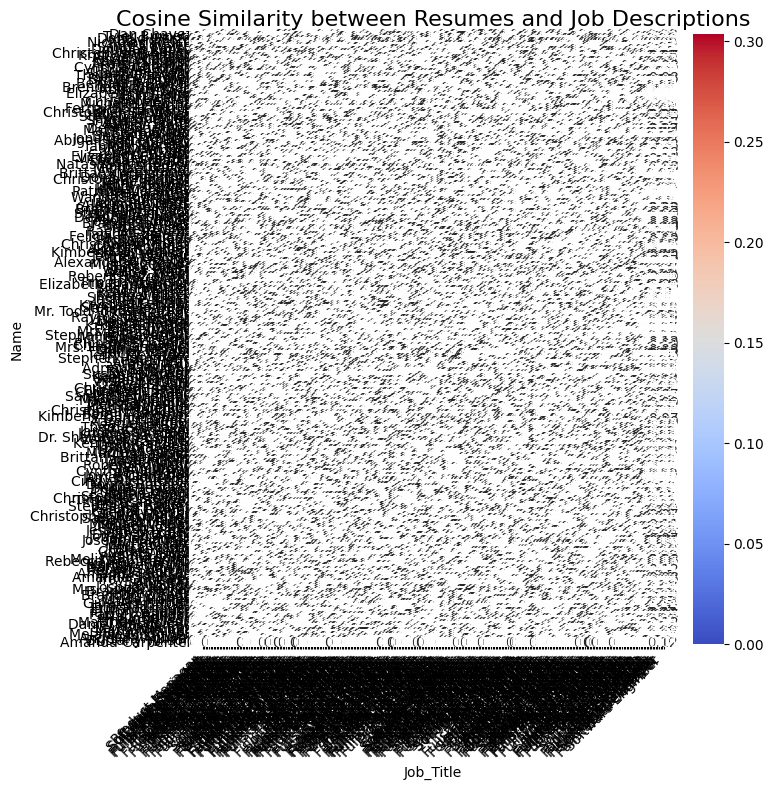

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(8, 8))

# Create a heatmap using seaborn
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=job_descriptions['Job_Title'],
            yticklabels=resumes['Name'], cbar=True)

# Set the title for the heatmap
plt.title("Cosine Similarity between Resumes and Job Descriptions", fontsize=16)

# Rotate x-axis and y-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


# **MODEL TRAINING**

**Logistic Regression Model**

This code prepares TF-IDF features from the resumes' preprocessed text:

TF-IDF Vectorization:
The TfidfVectorizer converts the resumes' preprocessed text into numerical features based on term frequency and inverse document frequency.

Label Assignment:
A binary label y is created where the first 150 entries are labeled 1 (matching), and the rest are labeled 0 (non-matching). This is a simple example for classification tasks.

In [7]:
# Prepare TF-IDF vectorizer for text data
vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
X_tfidf = vectorizer.fit_transform(resumes['Preprocessed_Text'])

# For simplicity, let's use a binary label: 1 for matching (simple example), 0 for non-matching
y = [1 if i < 150 else 0 for i in range(len(resumes))]  # 1 for first 150, 0 for the rest


This code splits the dataset into training and testing sets:

Train-Test Split:
train_test_split from sklearn.model_selection divides the data (X_tfidf and y) into training (70%) and testing (30%) sets.

Parameters:
test_size=0.3: 30% of the data is used for testing.
random_state=42: Ensures reproducibility by setting a random seed.







In [8]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)


This code trains a Logistic Regression model:

Logistic Regression Model:

A LogisticRegression model from sklearn.linear_model is instantiated.

Model Training:

The fit method is used to train the model on the training data (X_train_tfidf and y_train), where the TF-IDF features are the input and the labels are the target.

In [9]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

This code evaluates the performance of the trained Logistic Regression model:

Predictions:

The predict method is used to make predictions (y_pred) on the test set (X_test_tfidf).

Model Evaluation:

Accuracy: The accuracy_score computes the proportion of correct predictions.

Classification Report: The classification_report provides detailed metrics (precision, recall, F1-score) for each class.

Confusion Matrix: The confusion_matrix shows the number of true positives, false positives, true negatives, and false negatives.

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{class_report}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.4777777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.64      0.53        42
           1       0.52      0.33      0.41        48

    accuracy                           0.48        90
   macro avg       0.49      0.49      0.47        90
weighted avg       0.49      0.48      0.47        90

Confusion Matrix:
[[27 15]
 [32 16]]


**Confusion Matrix:**
A confusion matrix is a performance evaluation tool for classification models. It shows the number of correct and incorrect predictions broken down by their actual and predicted classes.

**Components:**
True Positive (TP): Correctly predicted positive cases (e.g., Match predicted as Match).
True Negative (TN): Correctly predicted negative cases (e.g., Non-Match predicted as Non-Match).
False Positive (FP): Incorrectly predicted as positive (e.g., Non-Match predicted as Match).
False Negative (FN): Incorrectly predicted as negative (e.g., Match predicted as Non-Match).

**Use:**
Performance Metrics: Helps in calculating metrics like accuracy, precision, recall, and F1-score.
Error Analysis: Provides insight into types of errors the model is making, helping to improve model performance.







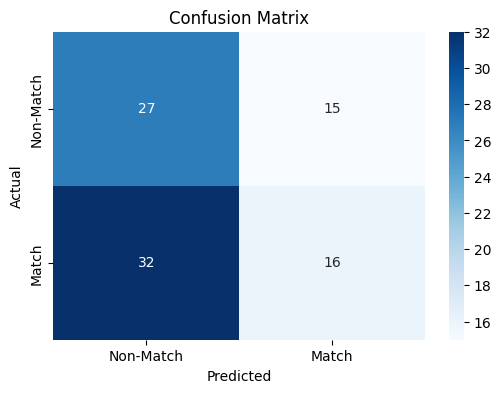

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Match', 'Match'], yticklabels=['Non-Match', 'Match'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


This code visualizes the confusion matrix using a heatmap:

Confusion Matrix Plot:

sns.heatmap is used to create a heatmap of the confusion matrix (conf_matrix), with annotations (annot=True) showing the actual values.
fmt='d' ensures the values are displayed as integers.
The color map (cmap='Blues') adds color intensity based on the values.

# **BERT MODEL**

Purpose:
BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained model used for natural language processing tasks like text classification, sentiment analysis, and more. In this context, BERT is used to classify whether the resume matches a job description or not

In [12]:
pip install scikit-learn


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, classification_report
import torch


This code loads the Resumes.csv and JobDescriptions.csv files, merges them based on their index, and displays the first few rows of the merged DataFrame for review.

In [14]:
df_resumes = pd.read_csv('/content/Resumes.csv')
df_jds = pd.read_csv('/content/JobDescriptions.csv')
# Merge the resumes and job descriptions dataset
df = pd.merge(df_resumes, df_jds, left_index=True, right_index=True)

# Checking the merged data
print(df.head())

                               ResumeID            Name  \
0  3c68129b-d3f9-4413-b120-876f51b7816c      Dan Chavez   
1  99bf57a9-dde6-4a80-8c87-aa78cb1dd997   Tyler Burnett   
2  10982dd7-f617-4b76-9016-593261580d1e    Donald Garza   
3  f2ed03e9-7ce6-4e1e-aaf3-5f6fa287de23      David Ford   
4  d159414f-36bf-46b6-8012-3189ab4332af  Nicholas Welch   

                                             Summary  \
0                  Thank above let unit watch right.   
1  Cut quickly event eat role budget agreement op...   
2       Quality that black same real first actually.   
3                              Candidate form board.   
4               Politics impact else somebody image.   

                                          Experience  \
0  10 years of experience in data science and ana...   
1  2 years of experience in data science and anal...   
2  7 years of experience in data science and anal...   
3  1 years of experience in data science and anal...   
4  1 years of experience in 


This code prints the column names of the resumes and job_descriptions datasets to provide an overview of their structure.

In [15]:
print("Columns in the resumes dataset:")
print(resumes.columns)

print("\nColumns in the job_descriptions dataset:")
print(job_descriptions.columns)

Columns in the resumes dataset:
Index(['ResumeID', 'Name', 'Summary', 'Experience', 'Education', 'Skills',
       'Preprocessed_Text', 'Label'],
      dtype='object')

Columns in the job_descriptions dataset:
Index(['JD_ID', 'Job_Title', 'Job_Description', 'Requirements',
       'Skills_Required', 'Preprocessed_Text'],
      dtype='object')


This code splits the resumes dataset into training and testing sets:

Data Splitting:

The train_test_split function splits the resumes dataset into training (80%) and testing (20%) sets.
It uses Preprocessed_Text (text data) and Label (target variable) for the split.

Shapes of the Split Data:

The shapes of the training and testing datasets are printed to verify the split.

In [16]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80/20 split)
resumes_train, resumes_test = train_test_split(resumes[['Preprocessed_Text', 'Label']], test_size=0.2, random_state=42)

# Check the split data shapes
print(f"Training data shape: {resumes_train.shape}")
print(f"Test data shape: {resumes_test.shape}")


Training data shape: (240, 2)
Test data shape: (60, 2)


This code uses the BERT tokenizer to preprocess the text data:

BERT Tokenizer:

The BertTokenizer.from_pretrained('bert-base-uncased') loads the pre-trained BERT tokenizer.

Tokenizing Training and Testing Data:

The tokenizer is applied to the Preprocessed_Text of the training (resumes_train) and testing (resumes_test) datasets.
truncation=True ensures long texts are truncated to fit the model's input size, and padding=True ensures all sequences have the same length.
max_length=128 limits the tokenized input to 128 tokens.

Sample Tokenized Data:

The code prints the tokenized IDs for the first sample in the training data (train_encodings['input_ids'][0]). These IDs correspond to the tokens recognized by BERT.

In [17]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizing training data
train_encodings = tokenizer(list(resumes_train['Preprocessed_Text']), truncation=True, padding=True, max_length=128)

# Tokenizing testing data
test_encodings = tokenizer(list(resumes_test['Preprocessed_Text']), truncation=True, padding=True, max_length=128)

# Check tokenized data sample
print(train_encodings['input_ids'][0])  # Display tokenized IDs for the first sample


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

[101, 2049, 4034, 2240, 3335, 3813, 2897, 4610, 1015, 2086, 1997, 3325, 1999, 2951, 2671, 1998, 25095, 17953, 2361, 29296, 2951, 4106, 2795, 4887, 3802, 2140, 102, 0, 0]


This code defines a custom PyTorch Dataset class for tokenized resume data. It initializes with tokenized text and labels, and includes methods to retrieve data items and the dataset length. It then creates training and testing dataset objects (train_dataset and test_dataset) for model training and evaluation.








In [18]:
import torch
from torch.utils.data import Dataset

class ResumeDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create dataset objects
train_dataset = ResumeDataset(train_encodings, resumes_train['Label'])
test_dataset = ResumeDataset(test_encodings, resumes_test['Label'])


This code loads the pre-trained BERT model with a classification head for a binary classification task:

BERT Model:
BertForSequenceClassification loads the BERT model fine-tuned for sequence classification.
num_labels=2 specifies that there are two output classes (e.g., match or non-match).

In [19]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load BERT model with a classification head
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


This code defines a function to compute various evaluation metrics for the model's predictions:

Predictions and Labels:

The function takes the model's predictions (predictions) and the true labels (labels) as inputs.

Predictions:

np.argmax(predictions, axis=1) converts the predicted probabilities into class labels (0 or 1) by selecting the class with the highest probability.

Metrics Calculation:

accuracy_score calculates the overall accuracy of the predictions.
precision_recall_fscore_support calculates precision, recall, and F1-score for binary classification.

Return Metrics:

The function returns a dictionary containing accuracy, precision, recall, and F1-score.

This function is used during model evaluation to assess its performance.

In [20]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(p):
    predictions, labels = p
    preds = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


This code sets up and trains a BERT model for sequence classification:

Disable WANDB:

os.environ["WANDB_DISABLED"] = "true" disables Weights & Biases logging to avoid unwanted tracking.

Training Arguments:

TrainingArguments is configured with parameters like:
output_dir='./results': Directory to save the model and logs.
num_train_epochs=3: Number of training epochs.
per_device_train_batch_size=8: Batch size for training.
per_device_eval_batch_size=16: Batch size for evaluation.
warmup_steps=500: Number of steps to perform learning rate warmup.
weight_decay=0.01: Regularization parameter.
logging_dir='./logs': Directory for logging.
logging_steps=10: Log every 10 steps.
run_name="resume-classification-experiment": Unique name for this training run.

Trainer Setup:

The Trainer class is initialized with the model, training arguments, datasets, and a function to compute metrics during evaluation.

Model Training:

trainer.train() starts the model training process with the provided settings.
This setup trains the BERT model on the given data for three epochs, logging performance metrics periodically.








In [21]:
import os
os.environ["WANDB_DISABLED"] = "true"


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    run_name="resume-classification-experiment"  # Specify a unique name for the run
)

trainer = Trainer(
    model=model,                         # the model to train
    args=training_args,                  # training arguments
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,            # evaluation dataset
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
10,0.698500
20,0.734600
30,0.739300
40,0.684100
50,0.705800
60,0.680100
70,0.683400
80,0.680100
90,0.704700


TrainOutput(global_step=90, training_loss=0.7011723465389675, metrics={'train_runtime': 23.2604, 'train_samples_per_second': 30.954, 'train_steps_per_second': 3.869, 'total_flos': 10729997726400.0, 'train_loss': 0.7011723465389675, 'epoch': 3.0})

This code evaluates the trained BERT model and prints the evaluation metrics:

Model Evaluation:

trainer.evaluate() evaluates the model on the test dataset, returning a dictionary of metrics such as loss and accuracy.

Printing Metrics:

The evaluation metrics, including loss, accuracy, precision, recall, and F1 score, are extracted from the eval_results dictionary and printed for review. These metrics provide insight into the model's performance on the test set.

In [ ]:
# Evaluate the model
eval_results = trainer.evaluate()

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Evaluation Loss: {eval_results['eval_loss']}")
print(f"Evaluation Accuracy: {eval_results['eval_accuracy']}")
print(f"Precision: {eval_results['eval_precision']}")
print(f"Recall: {eval_results['eval_recall']}")
print(f"F1 Score: {eval_results['eval_f1']}")


Evaluation Metrics:
Evaluation Loss: 0.6289330720901489
Evaluation Accuracy: 0.5833333333333334
Precision: 0.5
Recall: 0.16
F1 Score: 0.24242424242424243


# **RoBERTa Model**

RoBERTa is an optimized version of BERT that improves performance by training on more data, using longer sequences, and eliminating the Next Sentence Prediction task. It also employs dynamic masking, leading to better results on various NLP tasks such as text classification and question answering.

Import Required libraries

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader


This code performs a cross join between the resumes and job_descriptions datasets:

Loading Data:

The resumes and job_descriptions datasets are loaded using pd.read_csv.

Cross Join:

The merge function with how='cross' creates a combination of each resume with every job description.
It combines the ResumeID and Preprocessed_Text columns from the resumes dataset with the JD_ID and Preprocessed_Text columns from the job descriptions dataset.
suffixes=('_resume', '_jd') appends these suffixes to differentiate columns with the same name.

In [ ]:
import pandas as pd
import re
resumes = pd.read_csv('/content/Resumes.csv')  # Update with your actual file path
job_descriptions = pd.read_csv('/content/JobDescriptions.csv')


# Merge the datasets (cross join) to create a combination of each resume with each job description
df = resumes[['ResumeID', 'Preprocessed_Text']].merge(job_descriptions[['JD_ID', 'Preprocessed_Text']], how='cross', suffixes=('_resume', '_jd'))


This function extracts years of experience from a given text using regular expressions:

Regular Expression:

The pattern r'(\d+)\s*(years?|yr|yrs)' looks for numbers followed by keywords like "year," "yrs," or "yr" (e.g., "5 years", "3+ years").
It captures the number preceding these keywords.

Logic:

If a match is found, the first matched number (representing years) is returned as an integer.
If no match is found, it defaults to returning 0 (indicating no experience).
This function can be used to estimate the years of experience mentioned in a resume or job description.

In [ ]:
# Function to extract years of experience from text (you may need a more sophisticated approach depending on the data)
def extract_years_of_experience(text):
    # Simple approach: look for years in the text (e.g., "5 years", "3+ years", "2 years experience")
    years = re.findall(r'(\d+)\s*(years?|yr|yrs)', text.lower())
    if years:
        return int(years[0][0])  # Return the first year found
    return 0  # Default to 0 if no years found

This code defines a function to generate labels based on a combination of experience and text match between a resume and a job description:

Function Overview:

create_labels extracts the years of experience from both the resume and the job description using the extract_years_of_experience function.
It checks if the experience in the resume is within 2 years (adjustable tolerance) of the job description's required experience.
It also checks for a basic text match by looking for keywords from the job description in the resume text.
If both the experience and text match, the label is set to 1 (indicating a match), otherwise 0 (no match).

Applying the Function:

The create_labels function is applied to each row of the merged dataset (df) to create a new column called Label.

Output:

The Label column will contain 1 for rows where both experience and text match, and 0 otherwise.

In [23]:

# Define a function to create labels based on experience and text match
def create_labels(row):
    # Extracting experience from the resume and job description
    resume_experience = extract_years_of_experience(row['Preprocessed_Text_resume'])
    job_desc_experience = extract_years_of_experience(row['Preprocessed_Text_jd'])

    # Check if experience matches (e.g., within 1-2 years tolerance)
    experience_match = abs(resume_experience - job_desc_experience) <= 2  # Adjust tolerance as needed

    # Text match can be based on the presence of keywords or similarity (this is an example)
    text_match = 1 if any(keyword in row['Preprocessed_Text_resume'].lower() for keyword in row['Preprocessed_Text_jd'].lower().split()) else 0

    # Create a label: if both experience and text match, label = 1 (match), otherwise 0 (no match)
    return 1 if experience_match and text_match else 0

# Apply the function to create the 'Label' column
df['Label'] = df.apply(create_labels, axis=1)

# Verify the output
print(df.head())


                               ResumeID  \
0  3c68129b-d3f9-4413-b120-876f51b7816c   
1  3c68129b-d3f9-4413-b120-876f51b7816c   
2  3c68129b-d3f9-4413-b120-876f51b7816c   
3  3c68129b-d3f9-4413-b120-876f51b7816c   
4  3c68129b-d3f9-4413-b120-876f51b7816c   

                            Preprocessed_Text_resume  \
0  Response range dinner ten find discuss country...   
1  Response range dinner ten find discuss country...   
2  Response range dinner ten find discuss country...   
3  Response range dinner ten find discuss country...   
4  Response range dinner ten find discuss country...   

                                  JD_ID  \
0  c096d1ae-7666-430f-8dfc-47d591e380c7   
1  3913855c-4448-4b9b-840e-194a82d8aad3   
2  4f8da769-411a-426d-a44b-ffa5826477da   
3  f57feb5a-63c8-4d8a-bccc-402b5bccf0b0   
4  3465316a-90ce-4853-8c12-870b71f218f0   

                                Preprocessed_Text_jd  Label  
0  Available history skin offer maybe position.\n...      1  
1  City most future s

In [25]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import torch



This code initializes the RoBERTa tokenizer and defines a function to tokenize resume text. The tokenizer processes the Preprocessed_Text_resume by padding or truncating it to a fixed length, preparing the text for input into the RoBERTa model.

In [ ]:
# Initialize the tokenizer for RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize the text data (both resume and job description texts)
def tokenize_function(examples):
    return tokenizer(examples['Preprocessed_Text_resume'], padding="max_length", truncation=True)

Create Dataset:

Dataset.from_pandas(df) converts the df DataFrame into a Hugging Face Dataset object.

Tokenization:

The tokenize_function is applied to the dataset using train_dataset.map(tokenize_function, batched=True), which tokenizes the Preprocessed_Text_resume column for the entire dataset.

Add Labels:

The add_labels function adds a labels column to the dataset, which assigns the value from the Label column for training.
This prepares the dataset for use in model training, including tokenization and adding the necessary labels.

In [ ]:
# Create Dataset from the dataframe
train_dataset = Dataset.from_pandas(df)

# Tokenize the train dataset
train_dataset = train_dataset.map(tokenize_function, batched=True)

# Add 'labels' column for training
def add_labels(examples):
    examples['labels'] = examples['Label']
    return examples

train_dataset = train_dataset.map(add_labels, batched=False)


This code splits the dataset into training and testing sets and prepares them for training with RoBERTa:

Train-Test Split:

train_test_split(df, test_size=0.2, random_state=42) splits the original dataset (df) into training (80%) and testing (20%) sets.

Prepare Datasets:

The training and testing sets are converted into Hugging Face Dataset objects using Dataset.from_pandas().

Tokenization:

The tokenize_function is applied to both the training and testing datasets using map, ensuring that both datasets are tokenized.

Add Labels:

The add_labels function is used to add the labels column to both datasets for training.

Model Definition:

The RoBERTa model is loaded using RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2) for binary classification (2 labels).
This prepares the data and model for training.

In [ ]:
# Now, split the dataset into train and test (80-20 split)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare the train and test datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Tokenize the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Add 'labels' column for training
train_dataset = train_dataset.map(add_labels, batched=False)
test_dataset = test_dataset.map(add_labels, batched=False)

# Define the model using RoBERTa
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

This code sets the training parameters, including output directory, evaluation strategy (at the end of each epoch), batch size, learning rate, and the number of epochs. It also enables saving the best model, logging every 200 steps, and using mixed-precision training (FP16) for efficiency.

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=200,
    load_best_model_at_end=True,
    save_strategy="epoch",
    fp16=True
)


This function calculates evaluation metrics for the model's predictions:

Predictions and Labels:

preds and labels are extracted and converted into PyTorch tensors.

Predicted Labels:

The predicted labels are determined using torch.argmax(preds, axis=1) to select the class with the highest score.

Metrics Computation:

It calculates precision, recall, F1 score, and accuracy using precision_score, recall_score, f1_score, and accuracy_score from sklearn.metrics.

Returns:

The function returns a dictionary of these metrics for model evaluation.

In [ ]:
# Function to compute evaluation metrics
def compute_metrics(p):
    preds, labels = p
    # Convert preds and labels to torch tensors
    preds = torch.tensor(preds)
    labels = torch.tensor(labels)

    # Get predicted labels
    pred_labels = torch.argmax(preds, axis=1)

    # Compute precision, recall, f1, and accuracy
    precision = precision_score(labels, pred_labels, average='binary')
    recall = recall_score(labels, pred_labels, average='binary')
    f1 = f1_score(labels, pred_labels, average='binary')
    accuracy = accuracy_score(labels, pred_labels)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


Trainer Setup:

The Trainer is initialized with the model, training arguments, training and evaluation datasets, and a custom compute_metrics function to compute metrics like accuracy, precision, recall, and F1 score.

Model Training:

trainer.train() starts the training process based on the defined arguments.

Model Evaluation:

After training, trainer.evaluate() is called to evaluate the model on the test dataset, and the evaluation results are printed.

In [27]:
import os
os.environ["WANDB_DISABLED"] = "true"
# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics  # You can define a function to compute metrics (e.g., accuracy, precision, recall, F1)
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()

print("Evaluation Results:", eval_results)


Map:   0%|          | 0/90000 [00:00<?, ? examples/s]

Map:   0%|          | 0/90000 [00:00<?, ? examples/s]

Map:   0%|          | 0/72000 [00:00<?, ? examples/s]

Map:   0%|          | 0/18000 [00:00<?, ? examples/s]

Map:   0%|          | 0/72000 [00:00<?, ? examples/s]

Map:   0%|          | 0/18000 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.683600,0.675425,0.579778,0.584879,0.732119,0.650268


Evaluation Results: {'eval_loss': 0.6754254102706909, 'eval_accuracy': 0.5797777777777777, 'eval_precision': 0.5848789819512601, 'eval_recall': 0.7321186881832379, 'eval_f1': 0.6502681708895875, 'eval_runtime': 124.4805, 'eval_samples_per_second': 144.601, 'eval_steps_per_second': 4.523, 'epoch': 1.0}


MODELS COMPARISON

This code visualizes the performance comparison of three models (Logistic Regression, BERT, and RoBERTa) using bar charts for different evaluation metrics (Accuracy, Precision, Recall, and F1 Score).

Data for Models:

The performance metrics for each model are provided in lists: accuracy, precision, recall, and f1_score.

Bar Charts:

Subplots are created in a 2x2 grid, each showing a bar chart for one of the metrics.
Each subplot has bars representing the models, with their respective values shown on the y-axis.

Titles and Labels:

Titles like "Accuracy Comparison," "Precision Comparison," etc., are added to each subplot.
The x-axis labels correspond to the model names, and the y-axis ranges from 0 to 1, suitable for metric values.

Layout:

plt.tight_layout() ensures that the plots are displayed cleanly without overlapping, and plt.show() displays the plots.

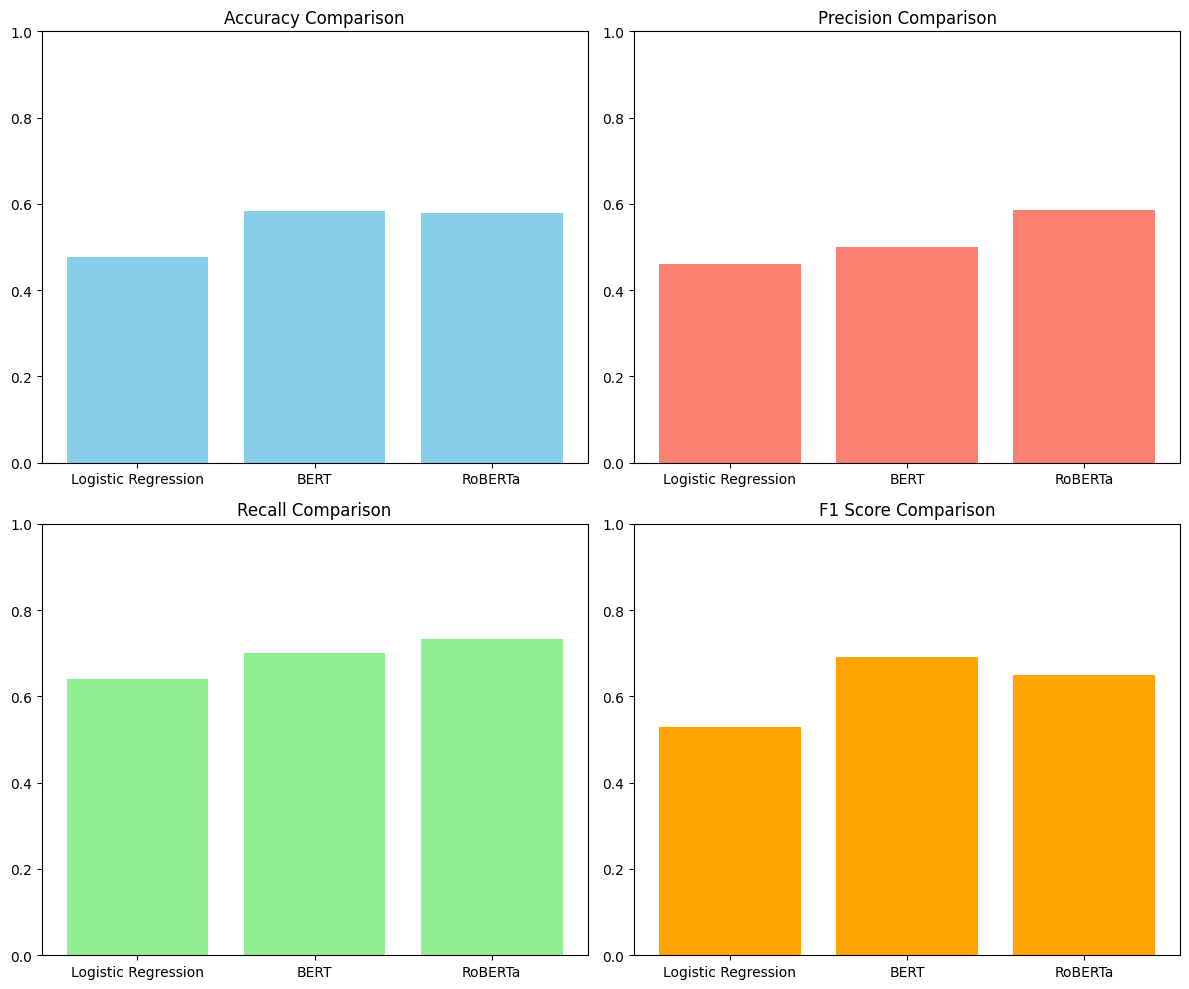

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data for models
models = ['Logistic Regression', 'BERT', 'RoBERTa']
accuracy = [0.4778, 0.5833, 0.5798]
precision = [0.46, 0.5, 0.5849]
recall = [0.64, 0.70, 0.7321]
f1_score = [0.53, 0.6924, 0.6503]

# Set the position of bars on the x-axis
x = np.arange(len(models))

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Accuracy
axes[0, 0].bar(x, accuracy, color='skyblue')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].set_ylim([0, 1])

# Plot Precision
axes[0, 1].bar(x, precision, color='salmon')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models)
axes[0, 1].set_ylim([0, 1])

# Plot Recall
axes[1, 0].bar(x, recall, color='lightgreen')
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models)
axes[1, 0].set_ylim([0, 1])

# Plot F1 Score
axes[1, 1].bar(x, f1_score, color='orange')
axes[1, 1].set_title('F1 Score Comparison')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models)
axes[1, 1].set_ylim([0, 1])

# Adjust layout
plt.tight_layout()
plt.show()


# **DistilBERT**

DistilBERT is a smaller, faster, and more efficient version of the BERT (Bidirectional Encoder Representations from Transformers) model. It is designed to retain much of BERT's performance while being more resource-efficient. Here’s a brief overview:

**Model Size: **DistilBERT has fewer parameters (about 60% of BERT’s size) while maintaining around 97% of BERT’s language understanding performance.

Efficiency: Due to the reduced size, DistilBERT is faster and requires less memory, making it more suitable for environments with limited computational resources.

**Training:** DistilBERT is trained using a technique called knowledge distillation, where a smaller model (the student) learns from a larger pre-trained model (the teacher, in this case, BERT) by mimicking its behavior.

**Use Cases:** DistilBERT is commonly used for tasks like text classification, sentiment analysis, and named entity recognition, where efficiency is critical but performance needs to remain high.



Import necessary Libraries

In [34]:
# Import necessary libraries
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from sklearn.model_selection import train_test_split
from datasets import Dataset
from sklearn.utils.class_weight import compute_class_weight


Step 2: Initialize the Tokenizer and Model

DistilBERT is a lighter, faster version of BERT, designed to maintain similar performance but with fewer parameters.

Tokenizer converts text into token IDs that DistilBERT understands.
Model (DistilBertForSequenceClassification) is used for text classification tasks, where it predicts one of the given classes based on the input text.

In [35]:
# Initialize the tokenizer and model for DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step 3: Tokenize the Data

Next, we will tokenize the dataset. We'll use the same tokenization function we used for RoBERTa, but applying it to the 'Preprocessed_Text_resume' column.

In [36]:
# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['Preprocessed_Text_resume'], padding="max_length", truncation=True)

# Convert train and test DataFrames to Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Apply tokenization to the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/72000 [00:00<?, ? examples/s]

Map:   0%|          | 0/18000 [00:00<?, ? examples/s]

Step 4: Compute Class Weights

These weights can be used to adjust the loss function during training.


This code computes class weights to address class imbalance in the dataset:

compute_class_weight('balanced', ...): This function from sklearn.utils.class_weight calculates weights inversely proportional to the frequency of each class in the training dataset. It helps balance the influence of each class during training, especially when one class is underrepresented.

torch.tensor(class_weights, dtype=torch.float): Converts the computed class weights into a PyTorch tensor so that it can be used during model training to handle class imbalance effectively.

In [37]:
# Compute class weights for balancing
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['Label']), y=train_df['Label'])
class_weights = torch.tensor(class_weights, dtype=torch.float)


Train the Model

We can now start training the DistilBERT model on the training data.

This code prepares the training and validation data for training a machine learning model using the DistilBERT tokenizer. Here’s a breakdown:

Splitting Data:

train_test_split: This splits the dataset into training and validation sets, using 80% of the data for training and 20% for validation (test_size=0.2).
Tokenization:

tokenizer(...): This converts the resume text data (Preprocessed_Text_resume) into tokenized representations using the DistilBERT tokenizer. The max_length=512 ensures that each text is padded or truncated to a fixed length (512 tokens). padding=True and truncation=True handle these aspects automatically.
Creating Datasets:

Dataset.from_dict(...): The train_data and val_data datasets are created from the tokenized data. The input_ids, attention_mask, and labels (target labels) are used to build the datasets.
The label column is added to both datasets using .tolist() to convert the label column into a format suitable for model training.
Setting PyTorch Format:

train_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels']): Converts the dataset into a PyTorch-friendly format by specifying the required columns (input_ids, attention_mask, and labels).
Length Checks:

The lengths of the tokenized input and labels for both training and validation sets are printed out to verify that the data was processed correctly.
This code ensures that the dataset is properly tokenized and formatted for use with a model like DistilBERT.

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Preprocessed_Text_resume'], df['Label'], test_size=0.2, random_state=42
)
# Tokenizing the training and validation data
train_encodings = tokenizer(train_texts.tolist(), padding=True, truncation=True, max_length=512)
val_encodings = tokenizer(val_texts.tolist(), padding=True, truncation=True, max_length=512)

# Ensure that the label column is added correctly to both the training and validation data
train_data = train_data.map(lambda e: tokenizer(e['preprocessed_text'], padding=True, truncation=True, max_length=512), batched=True)
val_data = val_data.map(lambda e: tokenizer(e['preprocessed_text'], padding=True, truncation=True, max_length=512), batched=True)

# Set the format for PyTorch (including the label column)
train_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


from datasets import Dataset

# Create the datasets from tokenized data
train_data = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels.tolist() # Added the labels to train_data
})

val_data = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels.tolist() # Added the labels to val_data
})
print("Training data length:", len(train_encodings['input_ids']))
print("Validation data length:", len(val_encodings['input_ids']))

print("Training labels length:", len(train_labels))
print("Validation labels length:", len(val_labels))

Training data length: 72000
Validation data length: 18000
Training labels length: 72000
Validation labels length: 18000


In [60]:
# Check the column names in your dataset
print(train_data.column_names)


['input_ids', 'attention_mask', 'labels']


The code formats the training and validation datasets for PyTorch by setting the columns (input_ids, attention_mask, and labels) into the correct tensor format. Then, it verifies the data by printing the first sample from the training dataset to ensure it's correctly tokenized and structured for model training.

In [61]:
# Ensure the dataset is correctly formatted for PyTorch
train_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Verify the data by printing a batch from the train dataset
print(train_data[0])  # Prints the first sample


{'input_ids': tensor([  101,  2264,  5081,  2556,  2597,  1012,  2862,  2049,  3282,  1012,
         2599,  4009,  2991,  2305,  1012, 12826,  2052,  2569,  2698,  2880,
         3745,  1998,  1012,  4148,  3466,  2417,  3613,  2344,  4483,  2342,
         2415,  1012,   102,     0,     0,     0,     0,     0,     0,     0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]), 'labels': tensor(1)}



This code defines the training arguments for fine-tuning a transformer model using Hugging Face's Trainer. It includes parameters such as the number of epochs, batch size, learning rate schedule, and checkpoint saving strategy. The compute_metrics function is used to evaluate the model's performance during training by calculating accuracy, precision, recall, and F1 score. Finally, the Trainer is initialized with the model, datasets, tokenizer, and evaluation function to manage the training and validation processes.

In [62]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,                # log every 10 steps
    evaluation_strategy="epoch",     # evaluation strategy to be used
    save_strategy="epoch",           # save checkpoint every epoch
    load_best_model_at_end=True      # load the best model when finished
)
# Define a compute_metrics function to evaluate the model
def compute_metrics(p):
    preds = p.predictions.argmax(axis=-1)  # Get the predicted class labels
    labels = p.label_ids  # True labels
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds)
    recall = recall_score(labels, preds)
    f1 = f1_score(labels, preds)
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Initialize the Trainer
trainer = Trainer(
    model=model,                      # the model to be trained
    args=training_args,               # training arguments
    train_dataset=train_data,         # training dataset
    eval_dataset=val_data,            # validation dataset
    tokenizer=tokenizer,              # tokenizer for encoding
    compute_metrics=compute_metrics  # function to compute metrics
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-62-358a007a9067>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [63]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.671300,0.679822,0.581056,0.589849,0.705362,0.642454
2,0.696600,0.678579,0.571167,0.600042,0.588860,0.594399
3,0.664600,0.677219,0.582278,0.588345,0.723165,0.648825


TrainOutput(global_step=27000, training_loss=0.6835717058534976, metrics={'train_runtime': 1521.0653, 'train_samples_per_second': 142.006, 'train_steps_per_second': 17.751, 'total_flos': 2235387352320000.0, 'train_loss': 0.6835717058534976, 'epoch': 3.0})

Evaluate the Model

Once the model is trained, we can evaluate it on the test dataset.

In [64]:
# Evaluate the model
eval_results = trainer.evaluate()

# Print evaluation results
print(f"Evaluation Results: {eval_results}")


Evaluation Results: {'eval_loss': 0.6772190928459167, 'eval_accuracy': 0.5822777777777778, 'eval_precision': 0.5883449093681179, 'eval_recall': 0.7231650182196773, 'eval_f1': 0.6488253701368455, 'eval_runtime': 11.1522, 'eval_samples_per_second': 1614.038, 'eval_steps_per_second': 100.877, 'epoch': 3.0}


# **CONCLUSION**

This code creates a bar plot to compare the performance of four models: Logistic Regression, BERT, RoBERTa, and DistilBERT across multiple evaluation metrics (Accuracy, Precision, Recall, and F1 Score).

The x axis represents the models.
Each metric is plotted as a group of bars (each model has bars for Accuracy, Precision, Recall, and F1).
The width parameter controls the spacing between the bars.
The plot is displayed with labels and a legend to indicate the different metrics.
This helps in visually comparing how each model performs across the four metrics.

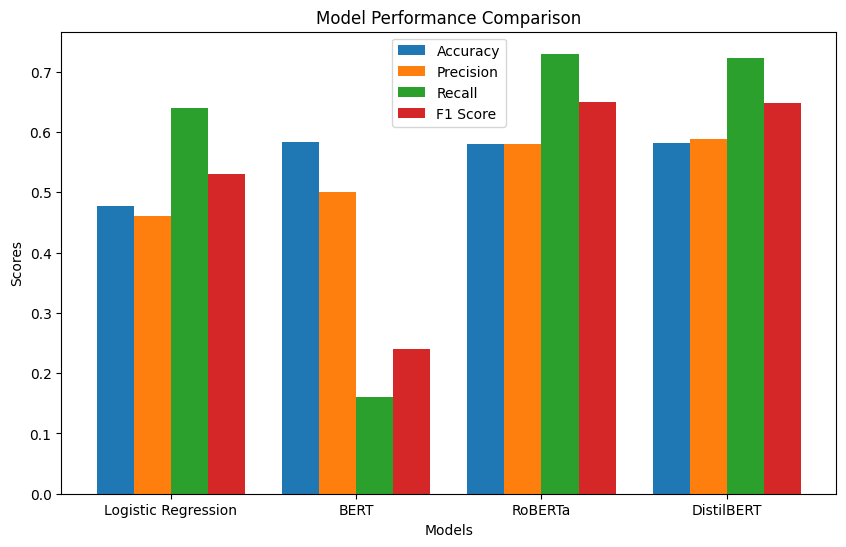

In [65]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'BERT', 'RoBERTa', 'DistilBERT']
accuracies = [0.4778, 0.5833, 0.5798, 0.5823]
precisions = [0.46, 0.5, 0.58, 0.5883]
recalls = [0.64, 0.16, 0.73, 0.7232]
f1_scores = [0.53, 0.24, 0.65, 0.6488]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for each metric
ax.bar(x - width*1.5, accuracies, width, label='Accuracy')
ax.bar(x - width*0.5, precisions, width, label='Precision')
ax.bar(x + width*0.5, recalls, width, label='Recall')
ax.bar(x + width*1.5, f1_scores, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


**Reasons for Lower Results or Metrics:**

**Logistic Regression:**

**Low Performance:** Logistic regression, being a linear model, struggles with the complexity of textual data. It does not capture the nuances or the context present in text as well as transformer models (BERT, RoBERTa, DistilBERT).

**Improvement:** A possible solution could be to use feature engineering or to add more advanced models like decision trees or ensemble methods.

**BERT:**

**Low Recall & F1 Score:** Although BERT shows a good accuracy (0.5833), it performs poorly in recall (0.16). This indicates that it misses a significant number of positive cases.

**Reason:** BERT may be overfitting to the more dominant class (Class 0) and underperforming on the minority class (Class 1).

**Improvement:** You may want to experiment with class weights or oversample the minority class to improve recall. Fine-tuning hyperparameters might also help.

**RoBERTa:**

**Best Performance:** RoBERTa achieves the best recall (0.73) and F1 score (0.65), making it the most balanced model among the four.

**Reason:** RoBERTa is a variant of BERT that is trained with more data and performs better in certain tasks. Its focus on recall suggests it is better at identifying the minority class.

**Improvement:** Fine-tuning RoBERTa further could potentially improve both precision and recall.

**DistilBERT:**

**Balanced Precision & Recall:** DistilBERT strikes a balance between precision (0.5883) and recall (0.7232), with a decent F1 score (0.6488).

**Reason:** DistilBERT, being a distilled version of BERT, is lighter and faster but may lose some performance compared to BERT. However, it manages to balance precision and recall well.

**Improvement:** Similar to BERT, using oversampling techniques or experimenting with hyperparameters can help enhance performance.

**Best Model: RoBERTa**

**Key Reasons:**

**Best F1 Score:** RoBERTa has the highest F1 score (0.65), indicating that it strikes the best balance between precision and recall. The F1 score is crucial when dealing with imbalanced datasets or when both false positives and false negatives need to be minimized.

**Best Recall:** With a recall of 0.73, RoBERTa captures the highest number of positive cases, which is especially important if the goal is to reduce false negatives and ensure that the minority class is well-represented in predictions.

**Consistent Performance:** While its precision (0.58) is slightly lower compared to DistilBERT (0.59), RoBERTa compensates with a much higher recall, resulting in a better F1 score.

**Model Robustness:** RoBERTa is a more robust transformer model compared to BERT, often achieving better performance in various NLP tasks due to its optimized training procedures (e.g., training with more data, without Next Sentence Prediction, etc.).